# Proyecto Fin de Máster: Sistema de Recomendación de Temas Musicales para Spotify

# 1. Exploración y análisis del dataset

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("dataset.csv")

# Ver las primeras filas
print(df.head())

# Información general
print(df.info())

# Tamaño del dataset
print("Shape:", df.shape)

# Comprobar valores nulos
print(df.isnull().sum())

   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [10]:
# Ver cuántas filas están duplicadas
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [2]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [3]:
print(df["track_genre"].value_counts())
print("Géneros únicos:", df["track_genre"].nunique())

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64
Géneros únicos: 114


In [4]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


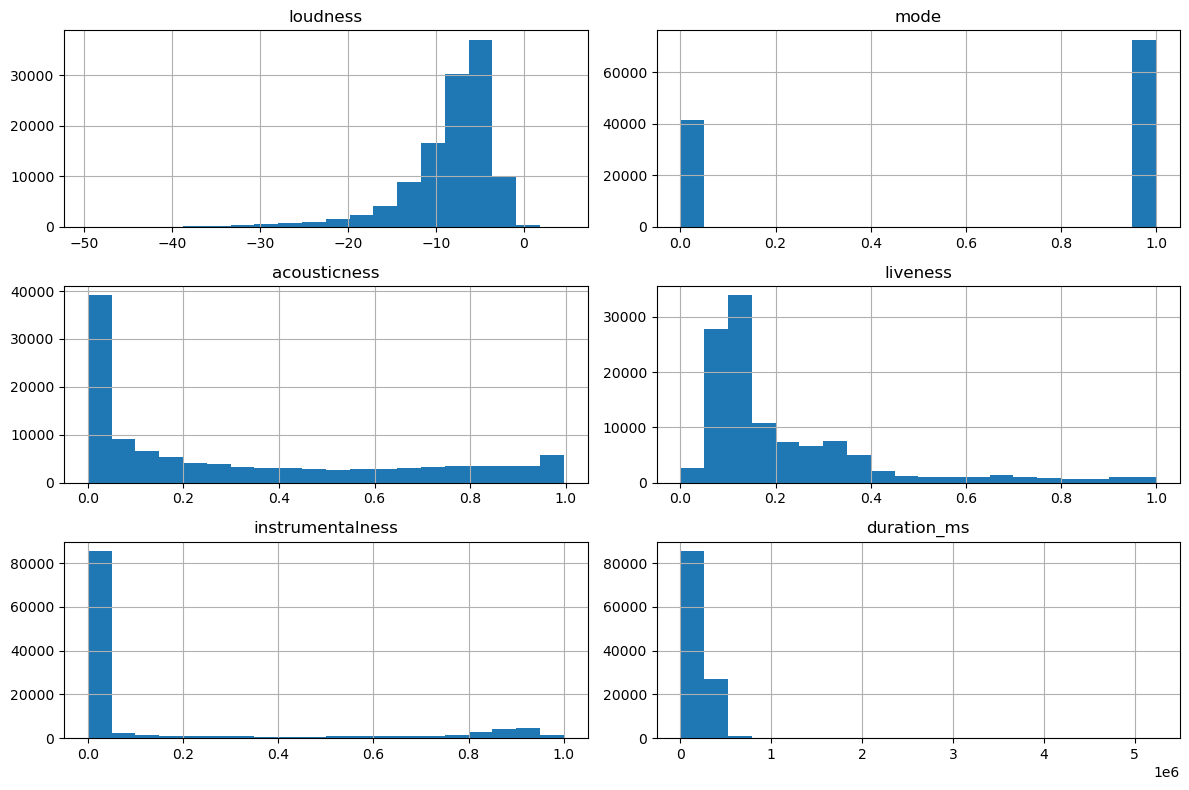

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de algunas características
features = ['loudness', 'mode', 'acousticness', 'liveness', 'instrumentalness', 'duration_ms']
df[features].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

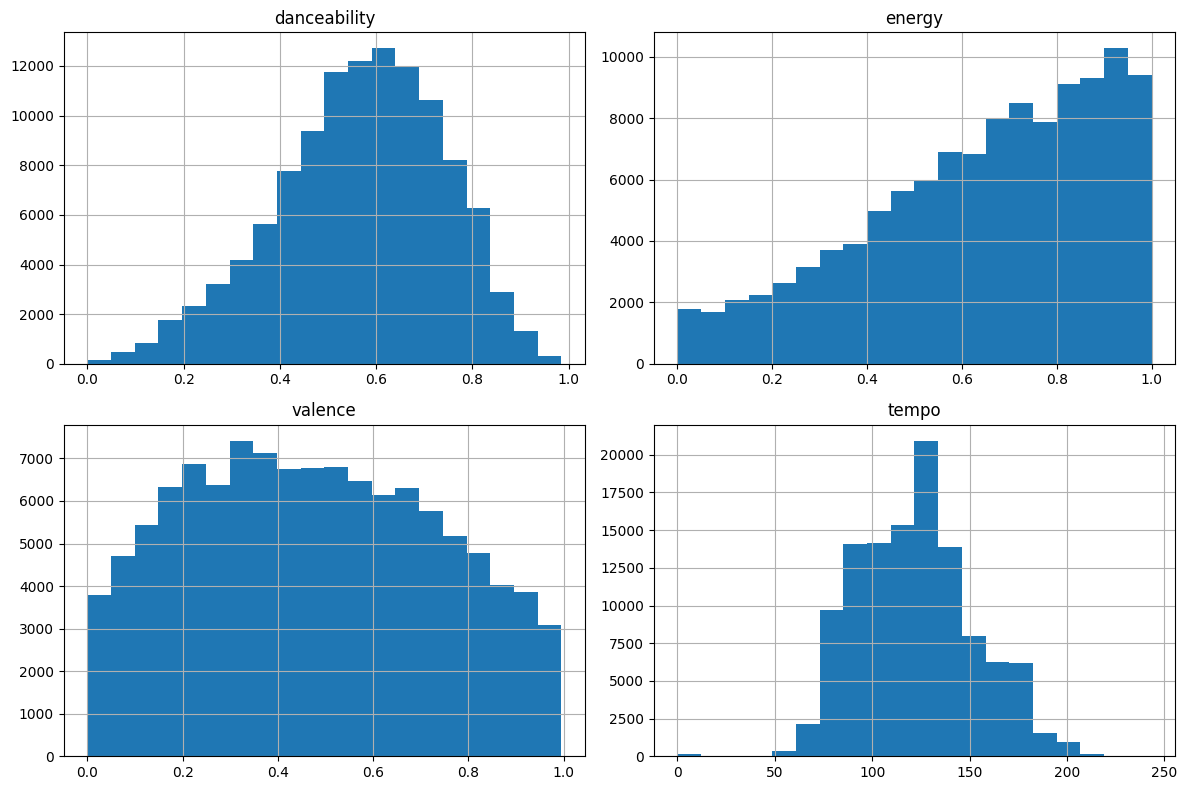

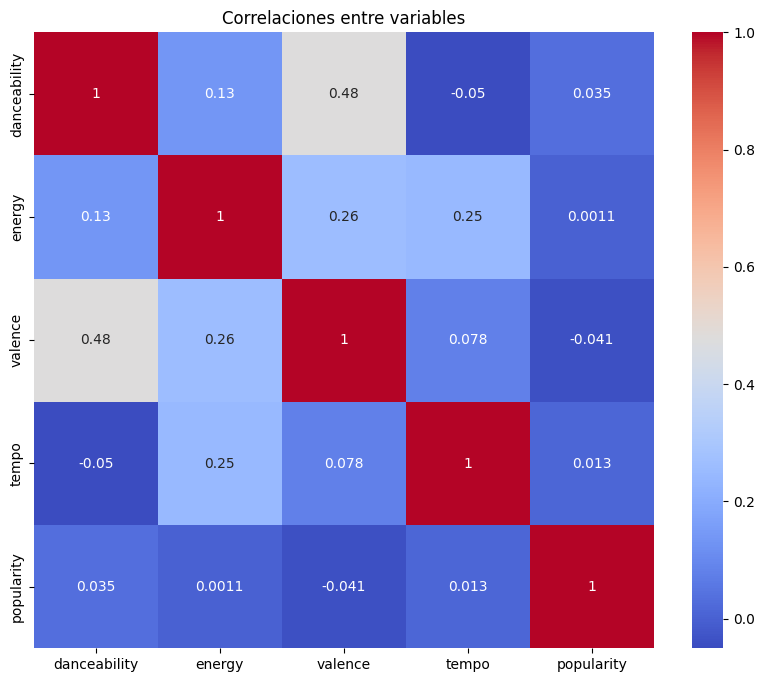

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de algunas características
features = ['danceability', 'energy', 'valence', 'tempo']
df[features].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[features + ['popularity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlaciones entre variables")
plt.show()

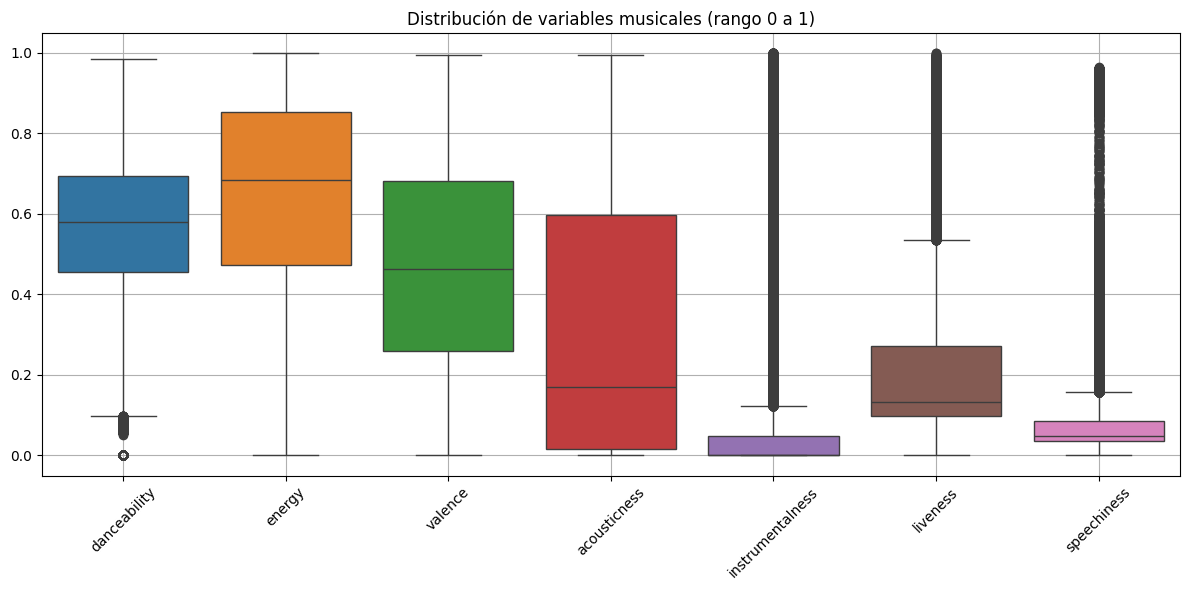

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("dataset.csv")

# Variables entre 0 y 1
variables_01 = ['danceability', 'energy', 'valence', 'acousticness',
                'instrumentalness', 'liveness', 'speechiness']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[variables_01])
plt.title("Distribución de variables musicales (rango 0 a 1)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

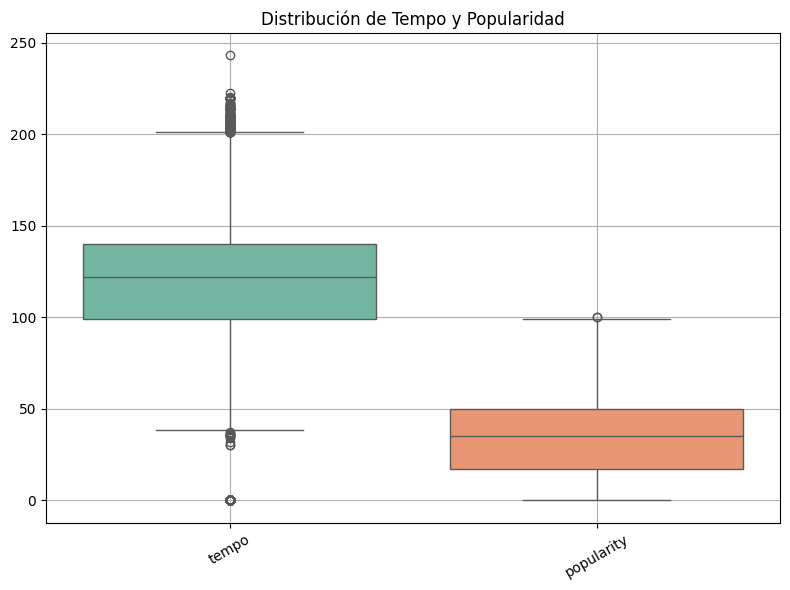

In [23]:
# Variables con escalas distintas
variables_ext = ['tempo', 'popularity']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[variables_ext], palette='Set2')
plt.title("Distribución de Tempo y Popularidad")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()


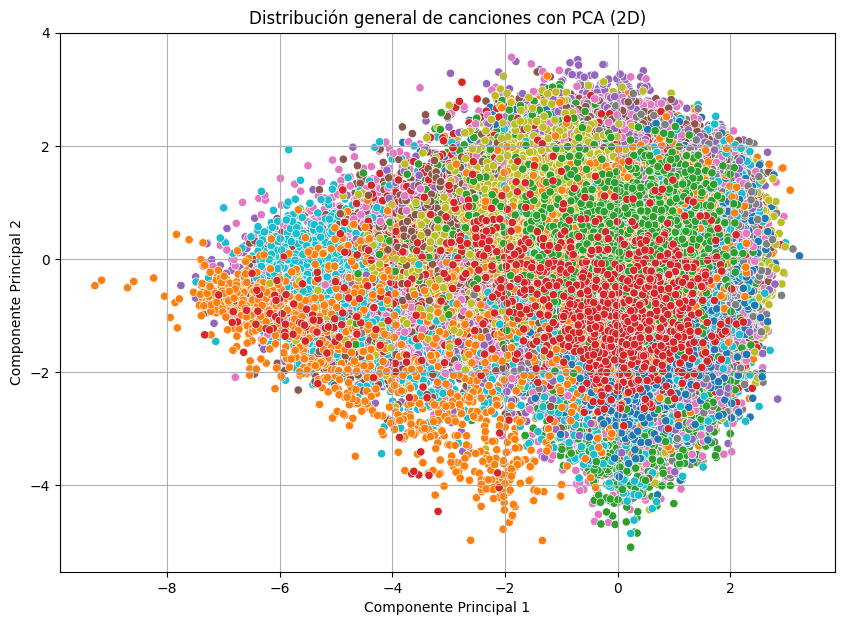

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numericas])

# PCA a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Agregar componentes al dataframe
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca['genre'] = df['track_genre']

# Visualizar
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='genre', palette='tab10', legend=False)
plt.title("Distribución general de canciones con PCA (2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

### Resumen
Se ha realizado una primera exploración del dataset spotify-tracks-dataset, el cual contiene información de 114.000 canciones, incluyendo tanto metadatos (como el nombre de la pista, artista, duración y género) como atributos de audio calculados automáticamente (por ejemplo, danceability, energy, valence, tempo, entre otros).

En esta fase se llevaron a cabo las siguientes acciones:

Carga y visualización inicial del dataset para identificar su estructura general.

Eliminación de la columna Unnamed: 0, generada automáticamente al guardar el archivo CSV.

Verificación de duplicados, confirmando que no existen registros repetidos.

Conteo y análisis de géneros musicales, observando que hay 114 géneros distintos representados de manera uniforme.

Estudio de estadísticas descriptivas de los atributos numéricos mediante .describe(), lo cual permitió detectar algunas variables con valores extremos pero dentro de un rango aceptable.

Visualización de distribuciones para variables clave (danceability, energy, valence, tempo), confirmando que presentan una dispersión adecuada para el modelado.

Análisis de correlaciones entre variables numéricas seleccionadas, destacando una correlación moderada entre danceability y valence, y relaciones más débiles en el resto. Se observa que la popularity no se correlaciona significativamente con los atributos musicales, lo que respalda la decisión de no usarla como criterio principal de recomendación.

# 2. Preprocesamiento y limpieza

In [6]:
print(df.columns)

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


In [7]:
features = [
    'danceability', 'energy', 'valence', 'acousticness', 'instrumentalness',
    'liveness', 'speechiness', 'loudness', 'tempo'
]

df_features = df[features].copy()

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=features)

In [9]:
# Añadir columnas como título, artista, popularidad o género
df_scaled['track_name'] = df['track_name']
df_scaled['artists'] = df['artists']
df_scaled['popularity'] = df['popularity']
df_scaled['track_genre'] = df['track_genre']

In [10]:
df_scaled.to_csv("spotify_scaled.csv", index=False)

### Resumen

Se seleccionaron las variables musicales más relevantes para medir similitud: danceability, energy, valence, acousticness, instrumentalness, liveness, speechiness, loudness y tempo.

Estas variables se normalizaron usando MinMaxScaler para que todas estén en el mismo rango (0 a 1).

Se conservaron columnas informativas (track_name, artists, popularity, track_genre) para mostrar resultados más claros.

El resultado fue un dataset limpio y escalado, listo para usar en el sistema de recomendación.

# 3. Diseño del modelo de recomendación

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Columnas de características musicales
feature_cols = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'loudness', 'tempo'
]

# Matriz de características
X = df_scaled[feature_cols]

# Diccionario con grupos de géneros
grupos_generos = {
    "reggaeton": ["latin", "latino", "reggaeton", "salsa", "samba", "sertanejo", "mpb", "pagode"],
    "pop": ["pop", "dance", "dancehall", "electropop", "synth-pop", "indie pop", "power-pop", "pop-film", "show-tunes", "j-pop", "k-pop"],
    "rock": ["rock", "alt-rock", "alternative", "hard-rock", "psych-rock", "punk", "punk-rock", "pop-rock", "grunge", "garage", "metal", "metalcore", "heavy-metal", "death-metal", "black-metal", "classic rock", "rock-n-roll"],
    "hiphop_urban": ["hip-hop", "rap", "trap", "r-n-b", "funk", "soul", "gospel", "reggae"],
    "electronic": ["electronic", "edm", "house", "techno", "progressive-house", "deep-house", "electro", "detroit-techno", "disco", "trance", "dubstep", "drum-and-bass", "minimal-techno"],
    "acoustic_folk": ["acoustic", "folk", "singer-songwriter", "country", "bluegrass", "honky-tonk", "americana"],
    "classical_jazz": ["classical", "jazz", "opera", "piano"],
    "world": ["world-music", "brazil", "turkish", "mandopop", "cantopop", "indian", "malay", "forro"],
    "soundtrack_misc": ["study", "sleep", "sad", "children", "comedy", "christmas", "anime", "disney"]
}

# Función de recomendación con agrupación de géneros
def recomendar_canciones(nombre_cancion, n=5):
    coincidencias = df_scaled[df_scaled['track_name'].str.lower() == nombre_cancion.lower()]

    if coincidencias.empty:
        return f"No se encontró la canción '{nombre_cancion}'."

    # Tomar la más popular si hay varias
    if len(coincidencias) > 1:
        coincidencias = coincidencias.sort_values(by='popularity', ascending=False)

    idx = coincidencias.index[0]
    cancion_base = df_scaled.loc[idx]
    genero_base = cancion_base['track_genre']
    artista_base = cancion_base['artists']
    nombre_base = cancion_base['track_name']

    # Determinar el grupo de géneros al que pertenece
    grupo_relacionado = next((lista for lista in grupos_generos.values() if genero_base in lista), [genero_base])

    # Calcular similitud
    similitudes = cosine_similarity([X.loc[idx]], X)[0]

    # Filtrar canciones del mismo grupo de géneros
    misma_categoria = df_scaled[df_scaled['track_genre'].isin(grupo_relacionado)].copy()

    # Eliminar canciones que sean exactamente la misma (por nombre y artista)
    misma_categoria = misma_categoria[~(
        (misma_categoria['track_name'].str.lower() == nombre_base.lower()) &
        (misma_categoria['artists'].str.lower() == artista_base.lower())
    )]

    # Recalcular índices y similitudes válidas
    indices_misma_categoria = misma_categoria.index
    similitudes_filtradas = [(i, similitudes[i]) for i in indices_misma_categoria]
    similitudes_filtradas = sorted(similitudes_filtradas, key=lambda x: x[1], reverse=True)[:n]

    # Recuperar canciones
    indices_finales = [i for i, _ in similitudes_filtradas]
    similitudes_finales = [s for _, s in similitudes_filtradas]

    resultados = df_scaled.loc[indices_finales, ['track_name', 'artists', 'track_genre', 'popularity']].copy()
    resultados['similaridad'] = similitudes_finales
    resultados = resultados.drop_duplicates(subset=['track_name', 'artists'])

    return resultados

In [17]:

# Ejemplo de uso:
recomendar_canciones("Unlonely", n=5)

,track_name,artists,track_genre,popularity,similaridad
19805,"Forever and Ever, Amen",Randy Travis,country,63,0.997905
99454,Manzil,Anupam Roy,singer-songwriter,41,0.997207
99871,I'm Fine,Sophie Pecora,singer-songwriter,41,0.996855
99018,Numb Little Bug,Em Beihold,singer-songwriter,78,0.996673


In [18]:
recomendar_canciones("I Miss You", n=5)

,track_name,artists,track_genre,popularity,similaridad
85878,Jdi domů Ivane,Rybičky 48,punk-rock,35,0.999463
44595,Electric Spider,The Presidents Of The United States Of America,grunge,30,0.998937
84784,Summer in the City - Remastered,The Lovin' Spoonful,psych-rock,65,0.998779
47796,Milésima Canção de Amor,Acústicos & Valvulados,hard-rock,36,0.998723
38127,Fake Tales Of San Francisco,Arctic Monkeys,garage,66,0.998722


In [15]:
recomendar_canciones("TBT", n=5)

,track_name,artists,track_genre,popularity,similaridad
51529,Baby Marvake Maanegi,Raftaar,hip-hop,59,0.998643
88483,Nada,Cali Y El Dandee;Danna Paola,reggae,0,0.998047
88490,Ganas,Greeicy,reggae,1,0.997947
51061,Amplifier,Imran Khan,hip-hop,70,0.997596
51031,SPACESHIP,AP Dhillon;Shinda Kahlon;Gminxr,hip-hop,73,0.997406


In [16]:
recomendar_canciones("Styrofoam", n=5)

,track_name,artists,track_genre,popularity,similaridad
800,SUN,Gen Hoshino,acoustic,48,0.998006
837,Living in the Moment,Jason Mraz,acoustic,48,0.997812
19637,A Girl Like You,Easton Corbin,country,0,0.997640
34040,Thug Le,Salim–Sulaiman;Vishal Dadlani;Shweta Pandit;Am...,folk,56,0.997420
34117,Dum Dum,Salim–Sulaiman;Benny Dayal;Himani Kapoor;Amita...,folk,50,0.997417


### Resumen

- Se construyó un recomendador basado en contenido usando similitud del coseno entre vectores de características musicales normalizadas.
- Se utilizaron atributos como danceability, energy, valence, acousticness, tempo, entre otros.
- Para evitar recomendaciones incoherentes, se agruparon géneros musicales similares en categorías más amplias (por ejemplo, "reggaeton", "rock", "electronic", etc.).
- En caso de canciones con el mismo nombre, se selecciona la versión más popular.
- El sistema excluye la canción original y elimina resultados duplicados (por nombre y artista).
- La salida incluye canción, artista, género, popularidad y puntuación de similitud.



# 4. Modelos alternativos para comparar

Se evaluará:

1. K-Nearest Neighbors (KNN)
Búsqueda de canciones similares mediante vecinos más cercanos en el espacio de características.

2. K-Means Clustering
Recomendación dentro del mismo grupo de afinidad musical detectado automáticamente.

3. PCA + Similitud
Reducción del espacio dimensional y recomendación en base a similitud en el nuevo espacio.

## Modelo 1: Recomendación con KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Volvemos a ajustar el modelo con el nuevo conjunto de features (que ya incluyen los géneros codificados)
knn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')  # n_neighbors = 1 + recomendaciones
knn_model.fit(df_scaled[feature_cols])


NearestNeighbors(metric='euclidean', n_neighbors=6)

In [18]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from IPython.display import display

# 1. Cargar dataset ya escalado y codificado
df_scaled = pd.read_csv("spotify_scaled.csv")

# 2. Dejar solo un registro por canción y artista (el más popular)
df_scaled = df_scaled.sort_values("popularity", ascending=False).drop_duplicates(subset=["track_name", "artists"])

# 3. Seleccionar columnas numéricas para el modelo
cols_excluir = ['track_name', 'artists', 'track_genre', 'popularity']
feature_cols = df_scaled.drop(columns=cols_excluir).columns

# 4. Ajustar modelo KNN
knn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn_model.fit(df_scaled[feature_cols])

# 5. Función de recomendación
def recomendar_knn(nombre_cancion, n=5):
    coincidencias = df_scaled[df_scaled['track_name'].str.lower() == nombre_cancion.lower()]

    if len(coincidencias) == 0:
        return f"No se encontró la canción '{nombre_cancion}'."

    elif len(coincidencias) > 1:
        opciones = coincidencias[['track_name', 'artists', 'track_genre', 'popularity']].drop_duplicates().reset_index(drop=True)
        print("Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):")
        display(opciones)
        eleccion = int(input(f"Introduce el número (0 a {len(opciones)-1}): "))
        seleccion = coincidencias.iloc[eleccion]
    else:
        seleccion = coincidencias.iloc[0]

    genero_ref = seleccion['track_genre']
    candidatos = df_scaled[df_scaled['track_genre'] == genero_ref].reset_index(drop=True)

    idx_local = candidatos[
        (candidatos['track_name'].str.lower() == seleccion['track_name'].lower()) &
        (candidatos['artists'] == seleccion['artists'])
    ].index[0]

    X = candidatos[feature_cols]
    similitudes = cosine_similarity([X.iloc[idx_local]], X)[0]
    indices_similares = np.argsort(similitudes)[::-1][1:n+1]

    resultados = candidatos.iloc[indices_similares][['track_name', 'artists', 'track_genre', 'popularity']].copy()
    resultados['similitud'] = similitudes[indices_similares]

    # Eliminar duplicados por si acaso
    resultados = resultados.drop_duplicates(subset=['track_name', 'artists'])

    return resultados

In [ ]:
recomendar_knn("Shape of You", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Shape of You,Ed Sheeran,pop,86
1,Shape Of You,Andrew Foy,guitar,24


,track_name,artists,track_genre,popularity,similitud
240,Tauba (feat. Badshah),Payal Dev;Badshah,pop,68,0.995677
95,"Mayakkama Kalakkama (From ""Thiruchitrambalam"")",Dhanush;Anirudh Ravichander,pop,77,0.995165
370,Halki Si Barsaat,Saaj Bhatt,pop,65,0.994554
359,Medley: Kehna Galat Galat / Halka Halka Suroor,Madhur Sharma;Nusrat Fateh Ali Khan,pop,65,0.993152
49,Closer,The Chainsmokers;Halsey,pop,84,0.991636


In [ ]:
recomendar_knn("I Miss You", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,I Miss You,blink-182,punk,78
1,I Miss You,SOYOU,k-pop,61
2,I Miss You,Adele,british,60
3,i miss you,Ichika Nito,guitar,55
4,I Miss You,SHRK;Shiloh Dynasty,sad,54
5,I Miss You,Embody,deep-house,48
6,I Miss You,Andy Lau,cantopop,19
7,I Miss You,Bladerunner,drum-and-bass,18


,track_name,artists,track_genre,popularity,similitud
436,Distant Dreamer,Duffy,british,46,0.997301
454,Time In A Bottle,YUNGBLUD,british,45,0.990772
414,Strawberry Fields Forever,The Beatles,british,48,0.989985
249,"god save me, but don't drown me out",YUNGBLUD,british,57,0.983326
262,strawberry lipstick,YUNGBLUD,british,56,0.979305


In [ ]:
recomendar_knn("Take Five", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Take Five,The Dave Brubeck Quartet,jazz,66
1,Take Five,Dave Brubeck,piano,51


,track_name,artists,track_genre,popularity,similitud
229,Diamonds Are A Girl's Best Friend,Julie London,jazz,0,0.987187
45,Blue Train,John Coltrane,jazz,59,0.987060
274,I've Got My Love To Keep Me Warm - Remastered ...,Dean Martin,jazz,0,0.985441
197,Something's Gotta Give - Single Version,Sammy Davis Jr.,jazz,0,0.984069
285,Almost Like Being In Love - Remastered,Nat King Cole,jazz,0,0.982212


In [ ]:
recomendar_knn("Lover", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Lover,Taylor Swift,pop,85
1,Lover,Diljit Dosanjh,pop-film,71
2,Lover,Otto Knows;Dice Of Nights;Alex Aris,progressive-house,54
3,Lover,Young Cister,latino,40
4,Lover,Luke Vibert,idm,10


,track_name,artists,track_genre,popularity,similitud
122,"Duniyaa (From ""Luka Chuppi"")",Akhil;Dhvani Bhanushali;Abhijit Vaghani;Bob,pop,74,0.992577
202,Baarish,Ash King;Shashaa Tirupati,pop,69,0.992561
405,Tere Bin Nahi Laage (Male Version),Uzair Jaswal,pop,64,0.991882
267,US (feat. Raja Kumari),Sidhu Moose Wala;Raja Kumari,pop,67,0.990354
47,Say You Won't Let Go,James Arthur,pop,85,0.990232


In [ ]:
recomendar_knn("Morado", n=5)

,track_name,artists,track_genre,popularity,similitud
171,4 besos,Lola Indigo;Rauw Alejandro;Lalo Ebratt,latin,0,0.997278
11,Chantaje (feat. Maluma),Shakira;Maluma,latin,76,0.996643
239,Ella Dice,TINI;KHEA,latin,0,0.996402
218,Es Tarde,Juanes,latin,0,0.996323
109,R.I.P.,Sofía Reyes;Rita Ora;Anitta,latin,1,0.995855


## Modelo 2: Recomendación con K-Means Clustering

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Cargar datos
df = pd.read_csv("spotify_scaled.csv")

# Nos aseguramos de quedarnos solo con una canción por artista y nombre (más popular)
df = df.sort_values("popularity", ascending=False).drop_duplicates(subset=["track_name", "artists"])

# Features numéricas y categóricas
feature_cols_num = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness',
    'loudness', 'tempo', 'popularity'
]
feature_col_cat = ['track_genre']

# 1. Normalizar numéricas
scaler = StandardScaler()
X_num = scaler.fit_transform(df[feature_cols_num])
df_num = pd.DataFrame(X_num, columns=feature_cols_num)

# 2. Codificar género
encoder = OneHotEncoder(sparse_output=False)  # para sklearn >=1.2
X_cat = encoder.fit_transform(df[feature_col_cat])
cat_cols = encoder.get_feature_names_out(feature_col_cat)
df_cat = pd.DataFrame(X_cat, columns=cat_cols)

# 3. Combinar
df_scaled = pd.concat([df_num, df_cat], axis=1)
df_scaled['track_name'] = df['track_name'].values
df_scaled['artists'] = df['artists'].values
df_scaled['track_genre'] = df['track_genre'].values
df_scaled['popularity'] = df['popularity'].values

# 4. K-Means
X_features = df_scaled.drop(columns=['track_name', 'artists', 'track_genre', 'popularity'])
kmeans = KMeans(n_clusters=15, random_state=42, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(X_features)

# 5. Función recomendadora
def recomendar_kmeans(nombre_cancion, n=5):
    # Buscar canciones con el mismo nombre (ignorando mayúsculas)
    coincidencias = df_scaled[df_scaled['track_name'].str.lower() == nombre_cancion.lower()]

    if len(coincidencias) == 0:
        return f"No se encontró la canción '{nombre_cancion}'."

    elif len(coincidencias) > 1:
        opciones = coincidencias[['track_name', 'artists', 'track_genre', 'popularity']].drop_duplicates(subset=['track_name', 'artists']).reset_index(drop=True)
        print("Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):")
        display(opciones)
        eleccion = int(input(f"Introduce el número (0 a {len(opciones)-1}): "))

        # Encontrar el índice real en df_scaled
        filtro = (
            (df_scaled['track_name'].str.lower() == opciones.loc[eleccion, 'track_name'].lower()) &
            (df_scaled['artists'] == opciones.loc[eleccion, 'artists'])
        )
        seleccion = df_scaled[filtro].iloc[0]
    else:
        seleccion = coincidencias.iloc[0]

    # Filtrar por canciones del mismo cluster
    cluster = seleccion['cluster']
    canciones_cluster = df_scaled[df_scaled['cluster'] == cluster].copy()

    # Eliminar la canción seleccionada
    canciones_cluster = canciones_cluster[
        ~((canciones_cluster['track_name'] == seleccion['track_name']) &
          (canciones_cluster['artists'] == seleccion['artists']))
    ]

    # Calcular similitud
    feature_data = canciones_cluster.drop(columns=['track_name', 'artists', 'track_genre', 'popularity', 'cluster'])
    seleccion_vec = seleccion[feature_data.columns].values.reshape(1, -1)
    similitudes = cosine_similarity(seleccion_vec, feature_data)[0]

    canciones_cluster['similaridad'] = similitudes
    canciones_cluster = canciones_cluster.sort_values(by='similaridad', ascending=False)

    return canciones_cluster[['track_name', 'artists', 'track_genre', 'similaridad', 'cluster']].head(n)

In [ ]:
recomendar_kmeans("Sweater Weather", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Sweater Weather,The Neighbourhood,alt-rock,93
1,Sweater Weather,Gaullin;Julian Perretta,electronic,63
2,Sweater Weather,Remzcore,french,61
3,Sweater Weather,Swattrex;Lofi By Swattrex,indian,0


,track_name,artists,track_genre,similaridad,cluster
72080,Paper Unicorn,Ochre,idm,0.912059,9
58487,Mountain,Paul Speer;David Lanz,new-age,0.898214,9
22222,Phase 09 - Sombrero,Solar Fields,ambient,0.897903,9
68935,Ashes To Ashes,Hans Zimmer,german,0.897723,9
66552,Through the Wall,Lorne Balfe,british,0.889448,9


In [ ]:
recomendar_kmeans("Sicko Mode", n=5)

,track_name,artists,track_genre,similaridad,cluster
80078,Usain Boo,Kodak Black,hip-hop,0.962707,5
12246,Jatt te Jawani,Dilpreet Dhillon;Karan Aujla,hip-hop,0.944622,5
80077,Codeine Dreaming,Kodak Black;Lil Wayne,hip-hop,0.923669,5
80020,Tic Tac,Future;Lil Uzi Vert,hip-hop,0.917798,5
10229,Positivity,Jordan Sandhu,hip-hop,0.903472,5


In [ ]:
recomendar_kmeans("Dynamite", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Dynamite,BTS,pop,85
1,Dynamite,Sean Paul;Sia,dancehall,68
2,Dynamite,China Anne McClain,disney,52
3,Dynamite,Audio Bullys,breakbeat,13


,track_name,artists,track_genre,similaridad,cluster
6625,Dynamite (feat. Sia),Sean Paul;Sia,dancehall,1.000000,3
45777,A Lo Natural,JuanchitoSaico,dancehall,0.971155,3
36033,Naked Truth,Sean Paul;Jhené Aiko,dancehall,0.962989,3
40855,I'm Still In Love With You,Sean Paul;Sasha,dancehall,0.954941,3
77458,Owo Mi Da,Tiwa Savage,dancehall,0.954902,3


In [ ]:
recomendar_kmeans("Sunflower", n=5)

,track_name,artists,track_genre,similaridad,cluster
29259,Dancing With A Stranger,Sara Farell,acoustic,0.992874,1
14474,As It Was,The Mayries,acoustic,0.990740,1
12402,Rockabye - Acoustic Version,The Mayries,acoustic,0.987383,1
37216,Let Her Go,Andrew Foy;Renee Foy,acoustic,0.987000,1
4118,Collide - Acoustic Version,Howie Day,acoustic,0.985132,1


In [ ]:
recomendar_kmeans("Hallelujah", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Hallelujah,Jeff Buckley,singer-songwriter,71
1,Hallelujah,Leonard Cohen,songwriter,64
2,Hallelujah,Rufus Wainwright,piano,62
3,Hallelujah,Boyce Avenue,acoustic,54
4,Hallelujah,Brian Crain,new-age,50
5,Hallelujah,Eddy Tyler,guitar,43
6,Hallelujah,NURKO;Devon Baldwin,dubstep,38
7,Hallelujah,Hillsong Worship,world-music,36
8,Hallelujah,AcousticTrench,guitar,32
9,Hallelujah,George Winston,new-age,25


,track_name,artists,track_genre,similaridad,cluster
65599,She Was Beautiful,The Celtic Tenors,opera,0.995173,10
65381,Mother Of Mine,Sumi Jo,opera,0.988246,10
52558,Maid Of Culmore,Celtic Thunder,opera,0.986355,10
65668,Hushabye Mountain,Amanda Holden,opera,0.983002,10
60870,"Los Pescadores de Perlas ""Mi Par D'udir Ancora""",Alfredo Kraus,opera,0.982795,10


In [ ]:
recomendar_kmeans("Let her go", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Let Her Go,Passenger,folk,75
1,Let Her Go,Boyce Avenue;Hannah Trigwell,acoustic,48
2,Let Her Go,Eddy Tyler,guitar,39
3,Let Her Go,Andrew Foy;Renee Foy,acoustic,38


,track_name,artists,track_genre,similaridad,cluster
41506,Ee Tanuvu Ninnade,Raghu Dixit,folk,0.948280,11
78443,Christmas Without You,Sheppard,folk,0.921072,11
8237,Atlantis - Slowed Down Version,Seafret,folk,0.908273,11
39676,Keno Karle,Fossils,folk,0.893810,11
33201,Tujhe Main Pyar Karu,Kailash Kher,folk,0.893386,11


## Modelo 3: PCA + Similitud

In [24]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display

# Cargar dataset preprocesado
df = pd.read_csv("spotify_scaled.csv")

# Eliminar duplicados por canción y artista, conservando la versión más popular
df = df.sort_values('popularity', ascending=False)
df = df.drop_duplicates(subset=['track_name', 'artists'], keep='first').reset_index(drop=True)

# Definir columnas para PCA
feature_cols = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness',
    'loudness', 'tempo', 'popularity'
]

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])

# Aplicar PCA (usar todas las componentes posibles sin exceder)
n_components = min(X_scaled.shape[0], X_scaled.shape[1])  # <= número mínimo de muestras y features
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f'pca_{i+1}' for i in range(X_pca.shape[1])])
df_pca['track_name'] = df['track_name']
df_pca['artists'] = df['artists']
df_pca['track_genre'] = df['track_genre']
df_pca['popularity'] = df['popularity']

# Función de recomendación con PCA + Cosine Similarity
def recomendar_pca(nombre_cancion, n=5):
    coincidencias = df_pca[df_pca['track_name'].str.lower() == nombre_cancion.lower()]

    if coincidencias.empty:
        return f"No se encontró la canción '{nombre_cancion}'."

    elif len(coincidencias) > 1:
        opciones = coincidencias[['track_name', 'artists', 'track_genre', 'popularity']].reset_index(drop=True)
        print("Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):")
        display(opciones)
        eleccion = int(input(f"Introduce el número (0 a {len(opciones)-1}): "))
        seleccion = coincidencias.iloc[eleccion]
    else:
        seleccion = coincidencias.iloc[0]

    print(f"\nCanción seleccionada: '{seleccion['track_name']}' de {seleccion['artists']}\n")

    # Preparar datos
    feature_data = df_pca.drop(columns=['track_name', 'artists', 'track_genre', 'popularity'])
    seleccion_vec = seleccion[feature_data.columns].values.reshape(1, -1)

    # Calcular similitudes
    similitudes = cosine_similarity(seleccion_vec, feature_data)[0]
    df_pca['similitud'] = similitudes

    # Ordenar y filtrar
    resultados = df_pca[df_pca['track_name'].str.lower() != seleccion['track_name'].lower()]
    resultados = resultados.sort_values(by='similitud', ascending=False)

    return resultados[['track_name', 'artists', 'track_genre', 'popularity', 'similitud']].head(n)

In [ ]:
recomendar_pca("Dynamite", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Dynamite,BTS,pop,85
1,Dynamite,Sean Paul;Sia,dancehall,68
2,Dynamite,China Anne McClain,disney,52
3,Dynamite,Audio Bullys,breakbeat,13



Canción seleccionada: 'Dynamite' de BTS



,track_name,artists,track_genre,popularity,similitud
416,Don't Start Now,Dua Lipa,dance,81,0.987501
62,Believer,Imagine Dragons,rock,88,0.986268
1944,Blue Hour,TOMORROW X TOGETHER,k-pop,73,0.984527
326,Classic,MKTO,rock,82,0.984401
395,Unforgettable,French Montana;Swae Lee,hip-hop,82,0.983955


In [ ]:
recomendar_pca("Stay", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Stay,Zedd;Alessia Cara,dance,76
1,STAY,BLACKPINK,k-pop,71
2,Stay,Gracie Abrams,indie,68
3,Stay,iamjakehill,sad,67
4,Stay,BTS,k-pop,67
5,Stay,Hans Zimmer,german,56
6,Stay,Thirty Seconds To Mars,grunge,54
7,Stay,Little Dragon;JID,goth,54
8,Stay,Alter Bridge,grunge,52
9,STAY,Our Last Night,metalcore,50



Canción seleccionada: 'Stay' de Andrew Foy



,track_name,artists,track_genre,popularity,similitud
69607,Angie (2015 Remaster),Bert Jansch,british,15,0.959955
51776,Digging Mountains,Breakfast For Brunch,study,26,0.955113
62389,Suspiro,Lucas Cervetti,world-music,21,0.951484
63793,At the Cross,Thad Fiscella,new-age,20,0.949096
61266,Yellow Bird,Leonard Kwan,guitar,21,0.948929


In [ ]:
recomendar_pca("Bohemian Rhapsody", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Bohemian Rhapsody,Queen,rock,75
1,Bohemian Rhapsody,Hayseed Dixie,bluegrass,22



Canción seleccionada: 'Bohemian Rhapsody' de Queen



,track_name,artists,track_genre,popularity,similitud
752,Tiny Dancer,Elton John,piano,78,0.979595
2684,Sleep On The Floor,The Lumineers,folk,70,0.973793
1284,Collide (feat. Tyga),Justine Skye;Tyga,alternative,75,0.963725
367,Dream On,Aerosmith,hard-rock,82,0.961139
431,A Thousand Years,Christina Perri,dance,81,0.960787


In [25]:
recomendar_pca("Let it go", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Let It Go,Colin & Caroline,acoustic,55
1,Let It Go,Boyce Avenue;Rachel Grae,acoustic,51
2,Let It Go,The Baseballs,rockabilly,26
3,Let It Go,The Infamous Stringdusters,bluegrass,23
4,Let It Go,Cold Confusion,hardstyle,21
5,Let It Go,D-Block & S-te-Fan;Josh & Wesz,hardstyle,21
6,Let It Go,Jon Sarta,disney,21
7,Let It Go,Cooltime Kids,kids,10



Canción seleccionada: 'Let It Go' de Jon Sarta



,track_name,artists,track_genre,popularity,similitud
63243,Son of Man (From 'Tarzan'),The Harp and the Piano,disney,20,0.995075
62350,I'm Wishing,Jon Sarta,disney,21,0.991084
61443,Finding A Way Past the Tears,Project AER;v i v,guitar,21,0.990062
48944,Your Love is Strong,Mezzo Piano,piano,28,0.988110
74881,Not Alone: I'm Here For You,Project AER;v i v,ambient,5,0.986936


In [38]:
recomendar_pca("Photograph", n=5)

Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Photograph,Ed Sheeran,pop,85
1,Photograph,Nickelback,grunge,69
2,Photograph,Def Leppard,hard-rock,68
3,Photograph,Boyce Avenue;Bea Miller,acoustic,67
4,Photograph,Andrew Foy;Renee Foy,guitar,30



Canción seleccionada: 'Photograph' de Ed Sheeran



,track_name,artists,track_genre,popularity,similitud
1087,Moral of the Story,Ashe,electro,76,0.981466
328,Hold On,Chord Overstreet,acoustic,82,0.980349
554,This Town,Niall Horan,dance,80,0.977029
500,If I Ain't Got You,Alicia Keys,soul,80,0.974703
153,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,r-n-b,85,0.974263


# 5. Selección del modelo

1. **Selección de canciones de prueba**
   - Se seleccionarán **10 canciones**, cada una de un **género diferente**.
   
2.**Aplicación de los modelos**
   - Para cada una de las 10 canciones seleccionadas, se obtendrán recomendaciones utilizando los 3 modelos propios de recomendación
   - Se extraerán las canciones recomendadas por cada modelo.

3. **Obtención de recomendaciones reales**
   - Se buscará manualmente cada una de las 10 canciones en Spotify.
   - Se anotarán las canciones sugeridas por la plataforma (por ejemplo, desde listas relacionadas o recomendaciones del sistema).
   - De estas, se conservarán únicamente las que también estén presentes en el dataset (para poder evaluarlas con los modelos).

4. **Comparación de rankings**
   - Se comparará el orden de las recomendaciones generadas por cada modelo con el orden real de las recomendaciones de Spotify (filtradas por existencia en el dataset).
   - Se evaluará cuál modelo produce una lista de recomendaciones más parecida a la real, de manera visual y cualitativa, observando la posición relativa y coincidencias en el ranking.

5. **Conclusión**
   - Se determinará cuál modelo tiene un comportamiento más cercano al de Spotify.
   - Este modelo se propondrá como el más adecuado para el sistema de recomendación final.

1. **Selección de canciones de prueba**

In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv("spotify_scaled.csv")

# Obtener la lista de géneros únicos
unique_genres = df['track_genre'].unique()

# Elegir 10 géneros aleatorios (sin semilla fija → diferente cada vez)
selected_genres = np.random.choice(unique_genres, size=10, replace=False)

# Filtrar el dataframe por los géneros seleccionados
filtered_df = df[df['track_genre'].isin(selected_genres)]

# Para cada género, seleccionar la canción con mayor popularidad
selected_songs = (
    filtered_df.sort_values("popularity", ascending=False)
    .groupby("track_genre")
    .head(1)
    .reset_index(drop=True)
)

# Mostrar las canciones seleccionadas
print("Canciones para comparar:\n")
print(selected_songs[['track_name', 'artists', 'track_genre', 'popularity']])

Canciones para comparar:

                             track_name                      artists  \
0                            La Bachata                Manuel Turizo   
1                              Atlantis                      Seafret   
2                               Ferrari   James Hype;Miggy Dela Rosa   
3                             The Motto               Tiësto;Ava Max   
4                              Envolver                       Anitta   
5  Here Comes The Sun - Remastered 2009                  The Beatles   
6               The Kids Aren't Alright                The Offspring   
7                  Delusions of Saviour                       Slayer   
8                             Afterglow         Wilkinson;Becky Hill   
9              Dreams (Will Come Alive)  2 Brothers On The 4th Floor   

     track_genre  popularity  
0         reggae          98  
1           folk          90  
2         groove          90  
3         trance          86  
4         pagode          

2.**Aplicación de los modelos**

In [54]:
import pandas as pd

# Lista de las 10 canciones seleccionadas
canciones_a_probar = [
    "La Bachata",
    "Atlantis",
    "Ferrari",
    "The Motto",
    "Envolver",
    "Here Comes The Sun - Remastered 2009",
    "The Kids Aren't Alright",
    "Delusions of Saviour",
    "Afterglow",
    "Dreams (Will Come Alive)"
]

# Lista para guardar resultados
recomendaciones_totales = []

# Evaluar cada canción en los tres modelos
for cancion in canciones_a_probar:
    print(f"\n Recomendaciones para: {cancion}")
    
    for modelo, funcion in [
        ("KNN", recomendar_knn),
        ("KMeans", recomendar_kmeans),
        ("PCA", recomendar_pca)
    ]:
        try:
            resultados = funcion(cancion, n=20)  # 20 recomendaciones
            for idx, fila in resultados.iterrows():
                recomendaciones_totales.append({
                    "Canción Base": cancion,
                    "Modelo": modelo,
                    "Posición": idx + 1,
                    "Recomendación": fila.get("track_name", ""),
                    "Artista": fila.get("artists", ""),
                    "Género": fila.get("track_genre", "")
                })
        except Exception as e:
            print(f" Error en modelo {modelo} con {cancion}: {e}")

# Convertir a DataFrame
df_resultado = pd.DataFrame(recomendaciones_totales)

# Exportar a CSV
df_resultado.to_csv("Evaluacion_Modelos_Recomendaciones.csv", index=False, encoding="utf-8-sig")
print(" Archivo CSV guardado como 'Evaluacion_Modelos_Recomendaciones.csv'")



 Recomendaciones para: La Bachata

Canción seleccionada: 'La Bachata' de Manuel Turizo


 Recomendaciones para: Atlantis
Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Atlantis,Seafret,folk,90
1,Atlantis,fenekot,chill,33


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Atlantis,Seafret,folk,90
1,Atlantis,fenekot,chill,33


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Atlantis,Seafret,folk,90
1,Atlantis,fenekot,chill,33



Canción seleccionada: 'Atlantis' de Seafret


 Recomendaciones para: Ferrari
Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Ferrari,James Hype;Miggy Dela Rosa,groove,90
1,Ferrari,O Tortuga,garage,32


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Ferrari,James Hype;Miggy Dela Rosa,groove,90
1,Ferrari,O Tortuga,garage,32


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Ferrari,James Hype;Miggy Dela Rosa,groove,90
1,Ferrari,O Tortuga,garage,32



Canción seleccionada: 'Ferrari' de James Hype;Miggy Dela Rosa


 Recomendaciones para: The Motto

Canción seleccionada: 'The Motto' de Tiësto;Ava Max


 Recomendaciones para: Envolver

Canción seleccionada: 'Envolver' de Anitta


 Recomendaciones para: Here Comes The Sun - Remastered 2009

Canción seleccionada: 'Here Comes The Sun - Remastered 2009' de The Beatles


 Recomendaciones para: The Kids Aren't Alright
Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,The Kids Aren't Alright,The Offspring,metal,81
1,The Kids Aren't Alright,Fall Out Boy,emo,60


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,The Kids Aren't Alright,The Offspring,metal,81
1,The Kids Aren't Alright,Fall Out Boy,emo,60


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,The Kids Aren't Alright,The Offspring,metal,81
1,The Kids Aren't Alright,Fall Out Boy,emo,60



Canción seleccionada: 'The Kids Aren't Alright' de The Offspring


 Recomendaciones para: Delusions of Saviour

Canción seleccionada: 'Delusions of Saviour' de Slayer


 Recomendaciones para: Afterglow
Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Afterglow,Wilkinson;Becky Hill,drum-and-bass,69
1,Afterglow,Bob Moses;Kasablanca,electronic,60
2,Afterglow,Nils Hoffmann,progressive-house,52
3,Afterglow,Phaeleh;Soundmouse,garage,49
4,Afterglow,Nicky Romero;GATTÜSO;Jared Lee,progressive-house,48
5,Afterglow,Andrew Foy;Renee Foy,acoustic,33
6,Afterglow,Ann Sweeten,new-age,21
7,Afterglow,Monolake,idm,10
8,Afterglow,Dinah Eastwood,jazz,0


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Afterglow,Wilkinson;Becky Hill,drum-and-bass,69
1,Afterglow,Bob Moses;Kasablanca,electronic,60
2,Afterglow,Nils Hoffmann,progressive-house,52
3,Afterglow,Phaeleh;Soundmouse,garage,49
4,Afterglow,Nicky Romero;GATTÜSO;Jared Lee,progressive-house,48
5,Afterglow,Andrew Foy;Renee Foy,acoustic,33
6,Afterglow,Ann Sweeten,new-age,21
7,Afterglow,Monolake,idm,10
8,Afterglow,Dinah Eastwood,jazz,0


Se encontraron varias canciones con ese nombre. Elige una opción (por número de fila):


,track_name,artists,track_genre,popularity
0,Afterglow,Wilkinson;Becky Hill,drum-and-bass,69
1,Afterglow,Bob Moses;Kasablanca,electronic,60
2,Afterglow,Nils Hoffmann,progressive-house,52
3,Afterglow,Phaeleh;Soundmouse,garage,49
4,Afterglow,Nicky Romero;GATTÜSO;Jared Lee,progressive-house,48
5,Afterglow,Andrew Foy;Renee Foy,acoustic,33
6,Afterglow,Ann Sweeten,new-age,21
7,Afterglow,Monolake,idm,10
8,Afterglow,Dinah Eastwood,jazz,0



Canción seleccionada: 'Afterglow' de Wilkinson;Becky Hill


 Recomendaciones para: Dreams (Will Come Alive)

Canción seleccionada: 'Dreams (Will Come Alive)' de 2 Brothers On The 4th Floor

 Archivo CSV guardado como 'Evaluacion_Modelos_Recomendaciones.csv'


Comparar lista de Spotify con las canciones del dataset

In [60]:
import pandas as pd
from fuzzywuzzy import fuzz
from tqdm import tqdm

# Cargar datos
spotify_df = pd.read_excel("Resultados_Recomendaciones_Spotify.xlsx")
dataset_df = pd.read_csv("spotify_scaled.csv")

# Normalización básica
def normalizar(texto):
    return str(texto).lower().strip()

spotify_df["clave"] = spotify_df["Recomendación"].apply(normalizar) + " - " + spotify_df["Artista"].apply(normalizar)
dataset_df["clave"] = dataset_df["track_name"].apply(normalizar) + " - " + dataset_df["artists"].apply(normalizar)

# Comparación con coincidencias aproximadas
def buscar_match(cancion, lista_claves, umbral=85):
    mejores = [(ref, fuzz.token_set_ratio(cancion, ref)) for ref in lista_claves]
    mejores = sorted(mejores, key=lambda x: x[1], reverse=True)
    return mejores[0] if mejores and mejores[0][1] >= umbral else (None, 0)

claves_dataset = dataset_df["clave"].tolist()
resultados = []

print("Buscando coincidencias aproximadas...")

for clave in tqdm(spotify_df["clave"]):
    match, score = buscar_match(clave, claves_dataset, umbral=85)
    resultados.append((clave, match, score))

# Añadir resultados
spotify_df["Match Dataset"] = [m[1] for m in resultados]
spotify_df["Score"] = [m[2] for m in resultados]
spotify_df["Está en Dataset"] = spotify_df["Score"] >= 85

# Guardar archivo con los resultados
spotify_df.to_csv("Verificacion_Canciones_Spotify_vs_Dataset.csv", index=False, encoding="utf-8-sig")
print("✅ Comparación completada y guardada en 'Verificacion_Canciones_Spotify_vs_Dataset.csv'")



Buscando coincidencias aproximadas...


100%|██████████| 576/576 [16:44<00:00,  1.74s/it]

✅ Comparación completada y guardada en 'Verificacion_Canciones_Spotify_vs_Dataset.csv'


In [65]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv("Verificacion_Canciones_Spotify_vs_Dataset.csv")

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower()

# Verifica las columnas disponibles
print("Columnas disponibles:", df.columns.tolist())

# Agrupar por canción base y 'está en dataset'
conteo = df.groupby(['canción base', 'está en dataset'])['recomendación'].count().unstack(fill_value=0)

# Renombrar columnas si ambas existen
if set(conteo.columns) == {False, True}:
    conteo.columns = ['No Encontradas', 'Encontradas']

# Calcular total y porcentaje
conteo['Total'] = conteo.sum(axis=1)
conteo['% Encontradas'] = round(conteo['Encontradas'] / conteo['Total'] * 100, 2)

# Mostrar
print(conteo)

# Guardar en CSV
conteo.to_csv("Resumen_Canciones_Encontradas_por_Base.csv", encoding="utf-8-sig")
print("Archivo guardado como 'Resumen_Canciones_Encontradas_por_Base.csv'")


Columnas disponibles: ['canción base', 'recomendación', 'artista', 'posición', 'clave', 'coincidencia aproximada', 'está en spotify', 'match dataset', 'score', 'está en dataset']
                          No Encontradas  Encontradas  Total  % Encontradas
canción base                                                               
Afterglow                             14           36     50          72.00
Atlantis                              20           30     50          60.00
Delusions of Saviour                  18           63     81          77.78
Dreams (Will Come Alive)              25           25     50          50.00
Envolver                               8           22     30          73.33
Ferrari                               16           55     71          77.46
Here Comes The Sun                     7           46     53          86.79
La Bachata                            43           19     62          30.65
The Kids Aren't Alright                8           71     79 

In [66]:
import pandas as pd
from fuzzywuzzy import fuzz

# Cargar archivos
modelos_df = pd.read_csv("Evaluacion_Modelos_Recomendaciones.csv")
spotify_df = pd.read_csv("Verificacion_Canciones_Spotify_vs_Dataset.csv")

# Normalización de texto
def normalizar(x):
    return str(x).strip().lower()

modelos_df["clave"] = modelos_df["Recomendación"].apply(normalizar) + " - " + modelos_df["Artista"].apply(normalizar)

# Filtrar solo recomendaciones de Spotify que están en el dataset
spotify_validas = spotify_df[spotify_df["Está en Dataset"] == True].copy()
spotify_validas["clave"] = spotify_validas["Recomendación"].apply(normalizar) + " - " + spotify_validas["Artista"].apply(normalizar)

# Agrupar recomendaciones de Spotify por canción base
spotify_grupo = {
    base: set(grupo["clave"]) for base, grupo in spotify_validas.groupby("Canción Base")
}

# Función para comprobar coincidencia aproximada con fuzzy matching
def hay_match(cadena, claves_spotify, umbral=85):
    for ref in claves_spotify:
        if fuzz.token_sort_ratio(cadena, ref) >= umbral:
            return True
    return False

# Comparar recomendaciones
resultados = []

for modelo in modelos_df["Modelo"].unique():
    for base in modelos_df["Canción Base"].unique():
        subset = modelos_df[(modelos_df["Modelo"] == modelo) & (modelos_df["Canción Base"] == base)]
        claves_modelo = subset["clave"].tolist()
        claves_spotify = spotify_grupo.get(base, set())
        
        coincidencias = sum(hay_match(clave, claves_spotify) for clave in claves_modelo)
        
        resultados.append({
            "Canción Base": base,
            "Modelo": modelo,
            "Recomendaciones Modelo": len(claves_modelo),
            "Recomendaciones Spotify": len(claves_spotify),
            "Coincidencias Aproximadas": coincidencias,
            "Porcentaje Coincidencia": round((coincidencias / len(claves_spotify)) * 100, 2) if claves_spotify else 0
        })

# Crear DataFrame y guardar
comparacion_df = pd.DataFrame(resultados)
comparacion_df.to_csv("Comparacion_Modelos_vs_Spotify_Reales.csv", index=False, encoding="utf-8-sig")
print("✅ Comparación completada. Guardado como 'Comparacion_Modelos_vs_Spotify_Reales.csv'")


✅ Comparación completada. Guardado como 'Comparacion_Modelos_vs_Spotify_Reales.csv'


In [67]:
import pandas as pd

# Cargar el CSV con los resultados
df = pd.read_csv("Comparacion_Modelos_vs_Spotify_Reales.csv")

# Agrupar por modelo para obtener totales
resumen_modelo = df.groupby("Modelo").agg({
    "Coincidencias Aproximadas": "sum",
    "Recomendaciones Spotify": "sum",
    "Recomendaciones Modelo": "sum"
}).reset_index()

# Calcular porcentaje global de coincidencia
resumen_modelo["% Coincidencia Global"] = round(
    (resumen_modelo["Coincidencias Aproximadas"] / resumen_modelo["Recomendaciones Spotify"]) * 100, 2
)

# Mostrar resultado
print(resumen_modelo)

# Guardar CSV si lo deseas
resumen_modelo.to_csv("Resumen_Global_Modelos_vs_Spotify.csv", index=False, encoding="utf-8-sig")


   Modelo  Coincidencias Aproximadas  Recomendaciones Spotify  \
0  KMeans                          3                      352   
1     KNN                          6                      352   
2     PCA                          5                      352   

   Recomendaciones Modelo  % Coincidencia Global  
0                     200                   0.85  
1                     200                   1.70  
2                     200                   1.42  


¿Por qué hay baja coincidencia entre los modelos y Spotify?
Las coincidencias entre las recomendaciones generadas por los modelos y las ofrecidas por Spotify son bajas. Esto es esperable debido a varios factores:

Diferencia en el enfoque: los modelos utilizados se basan únicamente en características musicales (recomendación basada en contenido), mientras que Spotify emplea algoritmos colaborativos que consideran el comportamiento de millones de usuarios.

Cobertura limitada del dataset: el sistema trabaja con un subconjunto del catálogo de Spotify, lo que reduce la posibilidad de coincidencias directas.

Falta de estandarización en los datos: los nombres de canciones y artistas no siempre están normalizados, lo que puede impedir coincidencias incluso cuando hay similitud real.

Recomendaciones personalizadas: Spotify no solo recomienda por similitud musical, sino también en función del historial, tendencias y descubrimiento, lo cual introduce mayor diversidad en las listas.

Se procede con el análisis cualitativo y selección del modelo final para implementarlo en Streamlit